# Plot Spectrogram from File

In [1]:
import spec_tools
import numpy as np
import pandas as pd
import ooipy
from matplotlib import pyplot as plt
import xarray as xr
import hvplot.xarray

In [2]:
start_time_pd = pd.Timestamp('1-1-2017')
end_time_pd = pd.Timestamp('1-15-2017')

base = pd.Timestamp(f'01-01-{start_time_pd.year}')
start_time = (start_time_pd - base).days*24
end_time = (end_time_pd - base).days*24

In [4]:
spec_dir = f'/Volumes/Ocean_Acoustics/Spectrograms/1 minute 4096 point PSDs/Axial_Base/{start_time_pd.year}'

time, freq, values = spec_tools.merge(start_time,end_time, spec_dir)

spec = ooipy.hydrophone.basic.Spectrogram(time, freq, values)
print('Shape of Spectrogram (frequency bins, time bins) - ', spec.values.shape)

100%|██████████| 336/336 [00:46<00:00,  7.29it/s]

(17341, 2049)


In [5]:
spec_x = xr.DataArray(spec.values, dims=['time','frequency'], coords={'time':spec.time, 'frequency':spec.freq}, name='Spectrogram')

In [6]:
spec_x.hvplot(x='time', y='frequency', rasterize=True, cmap='jet')

:DynamicMap   []
   :Image   [time,frequency]   (Spectrogram)

/Users/jhrag/Code/ocean_acoustics/ooipy/ooipy/tools/ooiplotlib.py:226: UserWarning: The following kwargs were not used by contour: 'fmax', 'plot', 'filename', 'savefig', 'dpi', 'res_reduction_time', 'save', 'title', 'xlabel', 'xlabel_rot', 'xlabel_format', 'ylabel', 'fmin', 'vdelta', 'vdelta_cbar', 'figsize', 'res_reduction_freq', 'fontsize', 'extend_type', 'logy'
  **kwargs


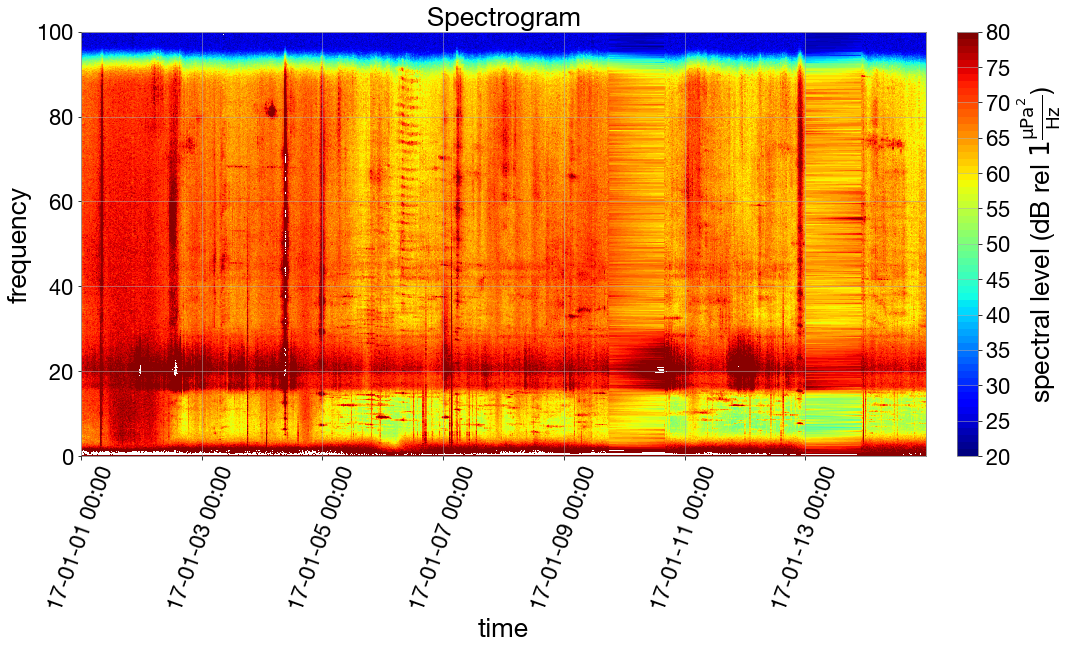

In [7]:
spec.plot(fmax=100, plot=True, filename='2_day_spectrogram_Eastern_Caldera.png', savefig=False,dpi=200, res_reduction_time=10)